# Lab | Data Cleaning and Formatting

In this lab, we will be working with the customer data from an insurance company, which can be found in the CSV file located at the following link: https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file1.csv


# Challenge 1: Data Cleaning and Formatting

## Exercise 1: Cleaning Column Names

To ensure consistency and ease of use, standardize the column names of the dataframe. Start by taking a first look at the dataframe and identifying any column names that need to be modified. Use appropriate naming conventions and make sure that column names are descriptive and informative.

*Hint*:
- *Column names should be in lower case*
- *White spaces in column names should be replaced by `_`*
- *`st` could be replaced for `state`*

In [1]:
import pandas as pd

insurance = pd.read_csv('https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file1.csv')

`Question` Column names should be in lower case

In [2]:
cols = []
for colname in insurance.columns:
    cols.append(colname.lower())
insurance.columns = cols

insurance.head()

,customer,st,gender,education,customer lifetime value,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323


`Question` White spaces in column names should be replaced by _

In [3]:
cols = []
for colname in insurance.columns:
    cols.append(colname.replace(' ','_'))
insurance.columns = cols

insurance.head()

,customer,st,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323


`Question` st could be replaced for state`

In [4]:
#example: donors = donors.rename(columns={'controln':'id','hv1':'median_home_val','ic1':'median_household_income'})

insurance = insurance.rename(columns={'st':'state'})
insurance.head()

,customer,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323


## Exercise 2: Cleaning invalid Values

### The dataset contains columns with inconsistent and incorrect values that could affect the accuracy of our analysis. Therefore, we need to clean these columns to ensure that they only contain valid data.

Note that this exercise will focus only on cleaning inconsistent values and will not involve handling null values (NaN or None).

*Hint*:
- *Gender column contains various inconsistent values such as "F", "M", "Femal", "Male", "female", which need to be standardized, for example, to "M" and "F".*
- *State abbreviations be can replaced with its full name, for example "AZ": "Arizona", "Cali": "California", "WA": "Washington"*
- *In education, "Bachelors" could be replaced by "Bachelor"*
- *In Customer Lifetime Value, delete the `%` character*
- *In vehicle class, "Sports Car", "Luxury SUV" and "Luxury Car" could be replaced by "Luxury"*

`Question` Gender column contains various inconsistent values such as "F", "M", "Femal", "Male", "female", which need to be standardized, for example, to "M" and "F".

In [5]:
def cleanGender(x):
    if x in ['M', 'Male']:
        return 'M'
    elif x in ['F', 'female','Femal']:
        return 'F'
    else:
        return 'NaN'

insurance['gender'] = list(map(cleanGender, insurance['gender']))
insurance['gender'].unique()  # To check the results again

array(['NaN', 'F', 'M'], dtype=object)

In [6]:
display(insurance['gender'].value_counts(dropna=False))

gender
NaN    3054
F       502
M       452
Name: count, dtype: int64

`Question`State abbreviations be can replaced with its full name, for example "AZ": "Arizona", "Cali": "California", "WA": "Washington"

In [7]:
insurance['state'].unique()

array(['Washington', 'Arizona', 'Nevada', 'California', 'Oregon', 'Cali',
       'AZ', 'WA', nan], dtype=object)

In [8]:
insurance['state'].value_counts(dropna=False)

state
NaN           2937
Oregon         320
California     211
Arizona        186
Cali           120
Nevada          98
Washington      81
WA              30
AZ              25
Name: count, dtype: int64

In [9]:
#insurance['customer lifetime value'] = list(map(lambda x: x.replace('%', ''), insurance['customer lifetime value']))


def cleanstate(x):
    if x in ['Cali']:
        return 'California'
    if x in ['California']:
        return 'California'
    elif x in ['AZ']:
        return 'Arizona'
    elif x in ['Arizona']:
        return 'Arizona'
    elif x in ['WA']:
        return 'Washington'
    elif x in ['Washington']:
        return 'Washington'
    elif x in ['Nevada']:
        return 'Nevada'
    elif x in ['Oregon']:
        return 'Oregon'
    else:
        return 'NaN'

insurance['state'] = list(map(cleanstate, insurance['state']))
insurance['state'].value_counts(dropna=False)






# insurance['state']=list(map(lambda x: x.replace('Cali','California'),insurance['state']))
# insurance['state']=list(map(lambda x: x.replace('AZ','Arizona'),insurance['state']))
# insurance['state']=list(map(lambda x: x.replace('WA','Washington'),insurance['state']))
# insurance['state'].unique()

state
NaN           2937
California     331
Oregon         320
Arizona        211
Washington     111
Nevada          98
Name: count, dtype: int64

`Question` In education, "Bachelors" could be replaced by "Bachelor"

In [10]:
insurance['education'].value_counts(dropna=False)

education
NaN                     2937
Bachelor                 324
College                  313
High School or Below     296
Master                    94
Doctor                    37
Bachelors                  7
Name: count, dtype: int64

In [11]:
insurance['education']=list(map(lambda x: str(x).replace('Bachelors','Bachelor'),insurance['education']))
insurance['education'].value_counts(dropna=False)

education
nan                     2937
Bachelor                 331
College                  313
High School or Below     296
Master                    94
Doctor                    37
Name: count, dtype: int64

`Question` In Customer Lifetime Value, delete the % character

In [12]:
insurance['customer_lifetime_value'] = list(map(lambda x: str(x).replace('%', ''), insurance['customer_lifetime_value']))


#after replacing the % sing, counting values to check if sign is gone, and see most repetitive values
insurance['customer_lifetime_value'].value_counts(dropna=False)

customer_lifetime_value
nan           2940
445811.34        4
251459.20        4
2412750.40       3
684615.03        3
              ... 
1210120.88       1
245357.08        1
507566.27        1
321497.94        1
899704.02        1
Name: count, Length: 1028, dtype: int64

`Question` In vehicle class, "Sports Car", "Luxury SUV" and "Luxury Car" could be replaced by "Luxury"

In [13]:
insurance['vehicle_class'].value_counts(dropna=False)

vehicle_class
NaN              2937
Four-Door Car     576
Two-Door Car      205
SUV               199
Sports Car         57
Luxury SUV         20
Luxury Car         14
Name: count, dtype: int64

In [14]:
def cleanvehicle_class(x):
    if x in ['Sports Car','Luxury SUV','Luxury Car']:
        return 'Luxury'
    if x in ['Four-Door Car']:
        return 'Four-Door Car'
    elif x in ['Two-Door Car']:
        return 'Two-Door Car'
    elif x in ['SUV']:
        return 'SUV'
    else:
        return 'nan'

insurance['vehicle_class'] = list(map(cleanvehicle_class, insurance['vehicle_class']))
insurance['vehicle_class'].value_counts(dropna=False)


vehicle_class
nan              2937
Four-Door Car     576
Two-Door Car      205
SUV               199
Luxury             91
Name: count, dtype: int64

## Exercise 3: Formatting data types

The data types of many columns in the dataset appear to be incorrect. This could impact the accuracy of our analysis. To ensure accurate analysis, we need to correct the data types of these columns. Please update the data types of the columns as appropriate.

It is important to note that this exercise does not involve handling null values (NaN or None).

*Hint*:
- *Customer lifetime value should be numeric*
- *Number of open complaints has an incorrect format. Look at the different values it takes with `unique()` and take the middle value. As an example, 1/5/00 should be 5. Number of open complaints is a string - remember you can use `split()` to deal with it and take the number you need. Finally, since it should be numeric, cast the column to be in its proper type.*

In [15]:
display(insurance.dtypes)

customer                      object
state                         object
gender                        object
education                     object
customer_lifetime_value       object
income                       float64
monthly_premium_auto         float64
number_of_open_complaints     object
policy_type                   object
vehicle_class                 object
total_claim_amount           float64
dtype: object

`Question` Customer lifetime value should be numeric

In [16]:
#Converting the customer lifetime value column into numeric values
insurance['customer_lifetime_value'] =  pd.to_numeric(insurance['customer_lifetime_value'], errors='coerce')/100


insurance['customer_lifetime_value'].value_counts(dropna=False)

customer_lifetime_value
NaN           2940
4458.1134        4
2514.5920        4
24127.5040       3
6846.1503        3
              ... 
12101.2088       1
2453.5708        1
5075.6627        1
3214.9794        1
8997.0402        1
Name: count, Length: 1028, dtype: int64

In [17]:
#Now we can see that CLTV turned to be numeric (float)
display(insurance.dtypes)

customer                      object
state                         object
gender                        object
education                     object
customer_lifetime_value      float64
income                       float64
monthly_premium_auto         float64
number_of_open_complaints     object
policy_type                   object
vehicle_class                 object
total_claim_amount           float64
dtype: object

`Question` Number of open complaints has an incorrect format. Look at the different values it takes with unique() and take the middle value. As an example, 1/5/00 should be 5. Number of open complaints is a string - remember you can use split() to deal with it and take the number you need. Finally, since it should be numeric, cast the column to be in its proper type.

In [18]:
insurance['number_of_open_complaints'].value_counts(dropna=False)

number_of_open_complaints
NaN       2937
1/0/00     830
1/1/00     138
1/2/00      50
1/3/00      34
1/4/00      13
1/5/00       6
Name: count, dtype: int64

In [19]:
#using the function fillna("0/0"), to substitute the NaN value with the strin "0/0" in the column CLTV

insurance['number_of_open_complaints']=insurance['number_of_open_complaints'].fillna("0/0")

insurance['number_of_open_complaints'].value_counts(dropna=False)

number_of_open_complaints
0/0       2937
1/0/00     830
1/1/00     138
1/2/00      50
1/3/00      34
1/4/00      13
1/5/00       6
Name: count, dtype: int64

In [20]:
#Using the function string.split('/'), to substitute the / sign, and then inserting the value of index [1] back into the column

insurance['number_of_open_complaints'] = list(map(lambda el: el.split('/')[1], insurance['number_of_open_complaints']))



In [21]:
#Here we can see we have taken the "/" signs out, and kept the number in between
insurance['number_of_open_complaints'].value_counts(dropna=False)

number_of_open_complaints
0    3767
1     138
2      50
3      34
4      13
5       6
Name: count, dtype: int64

## Exercise 4: Dealing with Null values

Identify any columns with null or missing values. Identify how many null values each column has. You can use the `isnull()` function in pandas to find columns with null values.

Decide on a strategy for handling the null values. There are several options, including:

- Drop the rows or columns with null values
- Fill the null values with a specific value (such as the column mean or median for numerical variables, and mode for categorical variables)
- Fill the null values with the previous or next value in the column
- Fill the null values based on a more complex algorithm or model (note: we haven't covered this yet)

Implement your chosen strategy to handle the null values. You can use the `fillna()` function in pandas to fill null values or `dropna()` function to drop null values.

Verify that your strategy has successfully handled the null values. You can use the `isnull()` function again to check if there are still null values in the dataset.

Remember to document your process and explain your reasoning for choosing a particular strategy for handling null values.

After formatting data types, as a last step, convert all the numeric variables to integers.

In [22]:
insurance.isnull()

,customer,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
0,False,False,False,False,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
4003,True,False,False,False,True,True,True,False,True,False,True
4004,True,False,False,False,True,True,True,False,True,False,True
4005,True,False,False,False,True,True,True,False,True,False,True
4006,True,False,False,False,True,True,True,False,True,False,True


In [23]:
for column in insurance:
    print(insurance[column].value_counts(dropna=False))
    print(     )

customer
NaN        2937
KH59823       1
HQ82233       1
OL72737       1
ZQ59828       1
           ... 
RO26085       1
ES57969       1
JK55587       1
RN97635       1
TA82973       1
Name: count, Length: 1072, dtype: int64

state
NaN           2937
California     331
Oregon         320
Arizona        211
Washington     111
Nevada          98
Name: count, dtype: int64

gender
NaN    3054
F       502
M       452
Name: count, dtype: int64

education
nan                     2937
Bachelor                 331
College                  313
High School or Below     296
Master                    94
Doctor                    37
Name: count, dtype: int64

customer_lifetime_value
NaN           2940
4458.1134        4
2514.5920        4
24127.5040       3
6846.1503        3
              ... 
12101.2088       1
2453.5708        1
5075.6627        1
3214.9794        1
8997.0402        1
Name: count, Length: 1028, dtype: int64

income
NaN        2937
0.0         252
43860.0       4
17622.0       4
1

In [24]:
#By performing the unique function in each column, we found out that there are 2937 rows, with empty (or'NaN') values (out of the 4008 in total). We will remove these rows

#Before removing rows, we will replace the NaN values of customer_lifetime_value with '0' to avoid loosing 3 rows (NaN values of cltv have a total of 2940)

insurance['customer_lifetime_value']= insurance['customer_lifetime_value'].fillna("0")

display(insurance['customer_lifetime_value'].value_counts(dropna=False))


#After checking in detail that the number of NaN counts for each column, we can suggest to drop all the 2937 NaN rows, using the function dropna



customer_lifetime_value
0                     2940
4458.1134                4
2514.592                 4
24127.504                3
6846.1503                3
                      ... 
12101.208799999999       1
2453.5708                1
5075.6627                1
3214.9794                1
8997.0402                1
Name: count, Length: 1028, dtype: int64

In [25]:
#Here we are removing al NaN rows, and we keep a total of 1071 rows
insurance = insurance.dropna()
insurance

,customer,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
0,RB50392,Washington,NaN,Master,0,0.0,1000.0,0,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,6979.5359,0.0,94.0,0,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,12887.4317,48767.0,108.0,0,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,7645.8618,0.0,106.0,0,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,5363.0765,36357.0,68.0,0,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...,...
1066,TM65736,Oregon,M,Master,3059.5503,38644.0,78.0,1,Personal Auto,Four-Door Car,361.455219
1067,VJ51327,California,F,High School or Below,20314.9976,63209.0,102.0,2,Personal Auto,SUV,207.320041
1068,GS98873,Arizona,F,Bachelor,3239.1247,16061.0,88.0,0,Personal Auto,Four-Door Car,633.600000
1069,CW49887,California,F,Master,4626.8011,79487.0,114.0,0,Special Auto,SUV,547.200000


In [26]:

pd.isnull(insurance)


,customer,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1066,False,False,False,False,False,False,False,False,False,False,False
1067,False,False,False,False,False,False,False,False,False,False,False
1068,False,False,False,False,False,False,False,False,False,False,False
1069,False,False,False,False,False,False,False,False,False,False,False


In [57]:
insurance.isna().sum()

customer                     0
state                        0
gender                       0
education                    0
customer_lifetime_value      0
income                       0
monthly_premium_auto         0
number_of_open_complaints    0
policy_type                  0
vehicle_class                0
total_claim_amount           0
dtype: int64

In [27]:
for column in insurance:
    print(insurance[column].value_counts(dropna=False))
    print(     )

customer
RB50392    1
HJ15383    1
AO74776    1
HQ82233    1
OL72737    1
          ..
RO26085    1
ES57969    1
JK55587    1
RN97635    1
MY31220    1
Name: count, Length: 1071, dtype: int64

state
California    331
Oregon        320
Arizona       211
Washington    111
Nevada         98
Name: count, dtype: int64

gender
F      502
M      452
NaN    117
Name: count, dtype: int64

education
Bachelor                331
College                 313
High School or Below    296
Master                   94
Doctor                   37
Name: count, dtype: int64

customer_lifetime_value
4458.1134             4
2514.592              4
0                     3
24127.504             3
6846.1503             3
                     ..
12101.208799999999    1
2453.5708             1
5075.6627             1
3214.9794             1
8997.0402             1
Name: count, Length: 1028, dtype: int64

income
0.0        252
43860.0      4
17622.0      4
36650.0      3
14072.0      3
          ... 
29486.0      1

In [28]:
#For those NaN rows in gender, we replaced them as unknown

def cleanGender2(x):
    if x in ['M', 'Male']:
        return 'M'
    elif x in ['F', 'female','Femal']:
        return 'F'
    else:
        return 'Unknown'

insurance['gender'] = list(map(cleanGender2, insurance['gender']))
insurance['gender'].unique()  # To check the results again

array(['Unknown', 'F', 'M'], dtype=object)

In [29]:
#Last, we will convert customer_lifetime_value and number_of_open_complaints into numerical columns

insurance['customer_lifetime_value'] =  pd.to_numeric(insurance['customer_lifetime_value'], errors='coerce')

insurance['number_of_open_complaints'] =  pd.to_numeric(insurance['number_of_open_complaints'], errors='coerce')

display(insurance.dtypes)

customer                      object
state                         object
gender                        object
education                     object
customer_lifetime_value      float64
income                       float64
monthly_premium_auto         float64
number_of_open_complaints      int64
policy_type                   object
vehicle_class                 object
total_claim_amount           float64
dtype: object

## Exercise 5: Dealing with duplicates

Use the `.duplicated()` method to identify any duplicate rows in the dataframe.

Decide on a strategy for handling the duplicates. Options include:
- Dropping all duplicate rows
- Keeping only the first occurrence of each duplicated row
- Keeping only the last occurrence of each duplicated row
- Dropping duplicates based on a subset of columns
- Dropping duplicates based on a specific column

Implement your chosen strategy using the `drop_duplicates()` function.

Verify that your strategy has successfully handled the duplicates by checking for duplicates again using `.duplicated()`.

Remember to document your process and explain your reasoning for choosing a particular strategy for handling duplicates.

Save the cleaned dataset to a new CSV file.

*Hint*: *after dropping duplicates, reset the index to ensure consistency*.

In [30]:
#Here we have check if there are any duplicated and the it shows that out of the 1071 resulted rows, there are'nt any duplicated values
check=insurance.duplicated()
print(check.to_string())


0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
30      False
31      False
32      False
33      False
34      False
35      False
36      False
37      False
38      False
39      False
40      False
41      False
42      False
43      False
44      False
45      False
46      False
47      False
48      False
49      False
50      False
51      False
52      False
53      False
54      False
55      False
56      False
57      False
58      False
59      False
60      False
61      False
62      False
63      False
64      False
65      False
66      False
67      False
68      False
69      False
70      False
71    

In [31]:
#Here we are resetting the index
insurance = insurance.reset_index(drop=True)

In [32]:
#Last, here we converted the cleaned data frame in a new csv
insurance.to_csv('cleaned_insurance_matias.csv', index=False)

In [33]:
#And very last, here we check if the new csv filed, was correctly created
insurance_new = pd.read_csv('cleaned_insurance_matias.csv')
display(insurance_new)
display(insurance.dtypes)


,customer,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
0,RB50392,Washington,Unknown,Master,0.0000,0.0,1000.0,0,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,6979.5359,0.0,94.0,0,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,12887.4317,48767.0,108.0,0,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,7645.8618,0.0,106.0,0,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,5363.0765,36357.0,68.0,0,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...,...
1066,TM65736,Oregon,M,Master,3059.5503,38644.0,78.0,1,Personal Auto,Four-Door Car,361.455219
1067,VJ51327,California,F,High School or Below,20314.9976,63209.0,102.0,2,Personal Auto,SUV,207.320041
1068,GS98873,Arizona,F,Bachelor,3239.1247,16061.0,88.0,0,Personal Auto,Four-Door Car,633.600000
1069,CW49887,California,F,Master,4626.8011,79487.0,114.0,0,Special Auto,SUV,547.200000


customer                      object
state                         object
gender                        object
education                     object
customer_lifetime_value      float64
income                       float64
monthly_premium_auto         float64
number_of_open_complaints      int64
policy_type                   object
vehicle_class                 object
total_claim_amount           float64
dtype: object

# Bonus: Challenge 2: creating functions on a separate `py` file

Put all the data cleaning and formatting steps into functions, and create a main function that performs all the cleaning and formatting.

Write these functions in separate .py file(s). By putting these steps into functions, we can make the code more modular and easier to maintain.

*Hint: autoreload module is a utility module in Python that allows you to automatically reload modules in the current session when changes are made to the source code. This can be useful in situations where you are actively developing code and want to see the effects of changes you make without having to constantly restart the Python interpreter or Jupyter Notebook kernel.*

In [ ]:
# Your code here

# Bonus: Challenge 3: Analyzing Clean and Formated Data

You have been tasked with analyzing the data to identify potential areas for improving customer retention and profitability. Your goal is to identify customers with a high policy claim amount and a low customer lifetime value.

In the Pandas Lab, we only looked at high policy claim amounts because we couldn't look into low customer lifetime values. If we had tried to work with that column, we wouldn't have been able to because customer lifetime value wasn't clean and in its proper format. So after cleaning and formatting the data, let's get some more interesting insights!

Instructions:

- Review the statistics again for total claim amount and customer lifetime value to gain an understanding of the data.
- To identify potential areas for improving customer retention and profitability, we want to focus on customers with a high policy claim amount and a low customer lifetime value. Consider customers with a high policy claim amount to be those in the top 25% of the total claim amount, and clients with a low customer lifetime value to be those in the bottom 25% of the customer lifetime value. Create a pandas DataFrame object that contains information about customers with a policy claim amount greater than the 75th percentile and a customer lifetime value in the bottom 25th percentile.
- Use DataFrame methods to calculate summary statistics about the high policy claim amount and low customer lifetime value data. To do so, select both columns of the dataframe simultaneously and pass it to the `.describe()` method. This will give you descriptive statistics, such as mean, median, standard deviation, minimum and maximum values for both columns at the same time, allowing you to compare and analyze their characteristics.

In [ ]:
# Your code here

# Lab | Customer Analysis Round 3

`Question` Show DataFrame info.

In [34]:
insurance = pd.read_csv('cleaned_insurance_matias.csv')
display(insurance)

,customer,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
0,RB50392,Washington,Unknown,Master,0.0000,0.0,1000.0,0,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,6979.5359,0.0,94.0,0,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,12887.4317,48767.0,108.0,0,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,7645.8618,0.0,106.0,0,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,5363.0765,36357.0,68.0,0,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...,...
1066,TM65736,Oregon,M,Master,3059.5503,38644.0,78.0,1,Personal Auto,Four-Door Car,361.455219
1067,VJ51327,California,F,High School or Below,20314.9976,63209.0,102.0,2,Personal Auto,SUV,207.320041
1068,GS98873,Arizona,F,Bachelor,3239.1247,16061.0,88.0,0,Personal Auto,Four-Door Car,633.600000
1069,CW49887,California,F,Master,4626.8011,79487.0,114.0,0,Special Auto,SUV,547.200000


In [35]:
insurance.shape

(1071, 11)

`Question` Describe DataFrame

In [36]:
insurance.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,1071.0,7914.670373,6439.447084,0.000000,4019.752750,5849.321500,8945.20995,58166.553500
income,1071.0,39295.701214,30469.427060,0.000000,14072.000000,36234.000000,64631.00000,99960.000000
monthly_premium_auto,1071.0,193.234360,1601.190369,61.000000,68.000000,83.000000,109.50000,35354.000000
number_of_open_complaints,1071.0,0.394024,0.883769,0.000000,0.000000,0.000000,0.00000,5.000000
total_claim_amount,1071.0,404.986909,293.027260,0.382107,202.157702,354.729129,532.80000,2893.239678


In [37]:
insurance.describe(include=[object]).T

,count,unique,top,freq
customer,1071,1071,RB50392,1
state,1071,5,California,331
gender,1071,3,F,502
education,1071,5,Bachelor,331
policy_type,1071,3,Personal Auto,780
vehicle_class,1071,4,Four-Door Car,576


`Question` Show a plot of the Gender breakdown.

In [39]:
#Rounding to 2 decimals before moving forward

def roundforme(x):
    return round(x,2)

insurance['customer_lifetime_value'] = list(map(roundforme, insurance['customer_lifetime_value']))

In [40]:
insurance['total_claim_amount'] = list(map(roundforme, insurance['total_claim_amount']))

In [41]:
insurance.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,1071.0,7914.670345,6439.447140,0.00,4019.75,5849.32,8945.21,58166.55
income,1071.0,39295.701214,30469.427060,0.00,14072.00,36234.00,64631.00,99960.00
monthly_premium_auto,1071.0,193.234360,1601.190369,61.00,68.00,83.00,109.50,35354.00
number_of_open_complaints,1071.0,0.394024,0.883769,0.00,0.00,0.00,0.00,5.00
total_claim_amount,1071.0,404.986928,293.027079,0.38,202.16,354.73,532.80,2893.24


In [42]:
#Importing libraries to create plots

import matplotlib.pyplot as plt
import scipy.stats as stats #to import correlation functions, in case needed in analysis
import seaborn as sns 

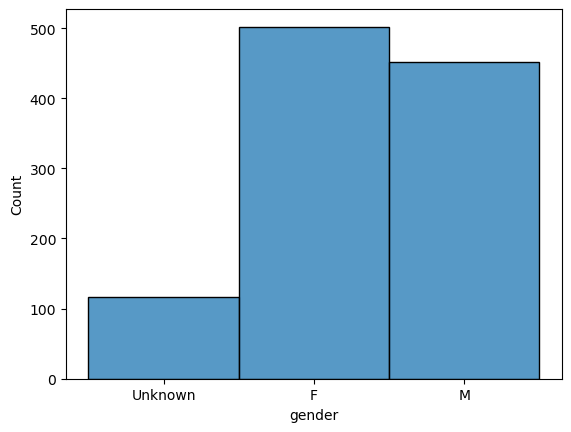

In [44]:
sns.histplot(insurance['gender'], bins=10)
plt.show()

In [45]:
insurance['gender'].value_counts()

gender
F          502
M          452
Unknown    117
Name: count, dtype: int64

`Question` Show a plot of Income by State

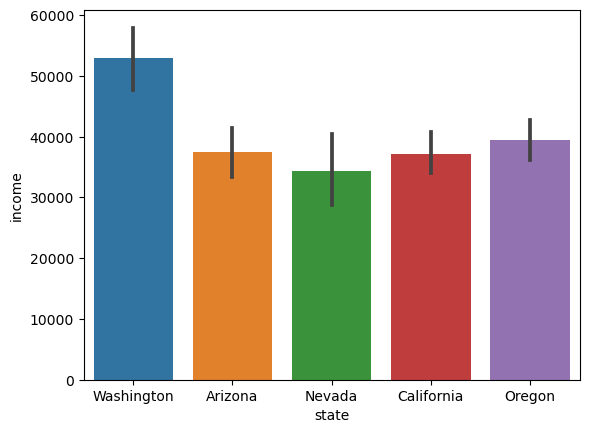

In [52]:
# barplot function makes the mean calculation in it (not sure how to make the total)

sns.barplot(x="state", y="income", data=insurance) 
plt.show()

`Question` Show a plot of the Policy Type by the Total Claim Amount.

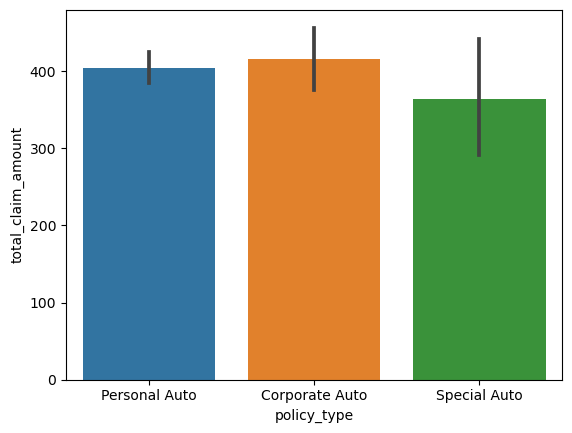

In [55]:
# barplot function makes the mean calculation in it (not sure how to make the total)


sns.barplot(x="policy_type", y="total_claim_amount", data=insurance) 
plt.show()

`Question` Show a plot of the Education by Vehicle Class.

[None, None, None, None, None, None, None, None, None, None]

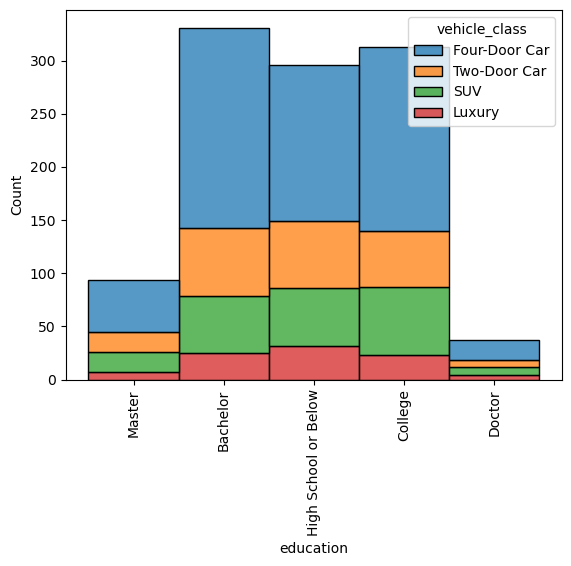

In [121]:
g = sns.histplot(x='education', hue='vehicle_class', data=insurance, stat='count', multiple='stack')
plt.setp(g.get_xticklabels(), rotation=90)


# Lab | Customer Analysis Round 4

In [83]:
import numpy as np

In [68]:
display(insurance)

,customer,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
0,RB50392,Washington,Unknown,Master,0.00,0.0,1000.0,0,Personal Auto,Four-Door Car,2.70
1,QZ44356,Arizona,F,Bachelor,6979.54,0.0,94.0,0,Personal Auto,Four-Door Car,1131.46
2,AI49188,Nevada,F,Bachelor,12887.43,48767.0,108.0,0,Personal Auto,Two-Door Car,566.47
3,WW63253,California,M,Bachelor,7645.86,0.0,106.0,0,Corporate Auto,SUV,529.88
4,GA49547,Washington,M,High School or Below,5363.08,36357.0,68.0,0,Personal Auto,Four-Door Car,17.27
...,...,...,...,...,...,...,...,...,...,...,...
1066,TM65736,Oregon,M,Master,3059.55,38644.0,78.0,1,Personal Auto,Four-Door Car,361.46
1067,VJ51327,California,F,High School or Below,20315.00,63209.0,102.0,2,Personal Auto,SUV,207.32
1068,GS98873,Arizona,F,Bachelor,3239.12,16061.0,88.0,0,Personal Auto,Four-Door Car,633.60
1069,CW49887,California,F,Master,4626.80,79487.0,114.0,0,Special Auto,SUV,547.20


In [72]:
insurance.dtypes

customer                      object
state                         object
gender                        object
education                     object
customer_lifetime_value      float64
income                       float64
monthly_premium_auto         float64
number_of_open_complaints      int64
policy_type                   object
vehicle_class                 object
total_claim_amount           float64
dtype: object

`Question` Check the data types of the columns. Get the numeric data into a dataframe called numerical and categorical columns in a dataframe called categorical. (You can use np.number and object to select the numerical data types and categorical data types respectively)


In [84]:
numerical = insurance.select_dtypes(include=[np.number])

In [82]:
categorical = insurance.select_dtypes(include=[object])

In [85]:
display(numerical)

,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,total_claim_amount
0,0.00,0.0,1000.0,0,2.70
1,6979.54,0.0,94.0,0,1131.46
2,12887.43,48767.0,108.0,0,566.47
3,7645.86,0.0,106.0,0,529.88
4,5363.08,36357.0,68.0,0,17.27
...,...,...,...,...,...
1066,3059.55,38644.0,78.0,1,361.46
1067,20315.00,63209.0,102.0,2,207.32
1068,3239.12,16061.0,88.0,0,633.60
1069,4626.80,79487.0,114.0,0,547.20


In [86]:
display(categorical)

,customer,state,gender,education,policy_type,vehicle_class
0,RB50392,Washington,Unknown,Master,Personal Auto,Four-Door Car
1,QZ44356,Arizona,F,Bachelor,Personal Auto,Four-Door Car
2,AI49188,Nevada,F,Bachelor,Personal Auto,Two-Door Car
3,WW63253,California,M,Bachelor,Corporate Auto,SUV
4,GA49547,Washington,M,High School or Below,Personal Auto,Four-Door Car
...,...,...,...,...,...,...
1066,TM65736,Oregon,M,Master,Personal Auto,Four-Door Car
1067,VJ51327,California,F,High School or Below,Personal Auto,SUV
1068,GS98873,Arizona,F,Bachelor,Personal Auto,Four-Door Car
1069,CW49887,California,F,Master,Special Auto,SUV


`Question` 
Now we will try to check the normality of the numerical variables visually:
- Use seaborn library to construct distribution plots for the numerical variables

C:\Users\mburm\AppData\Local\Temp\ipykernel_21608\1736509712.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical[column],bins=10)


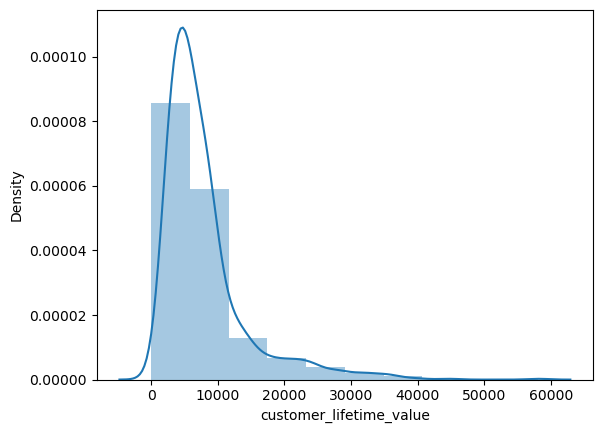

C:\Users\mburm\AppData\Local\Temp\ipykernel_21608\1736509712.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical[column],bins=10)


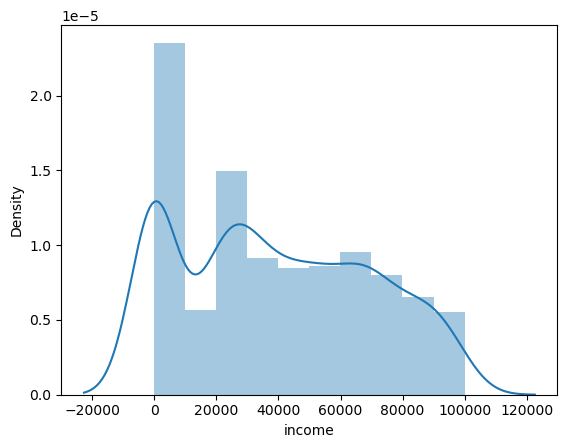

C:\Users\mburm\AppData\Local\Temp\ipykernel_21608\1736509712.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical[column],bins=10)


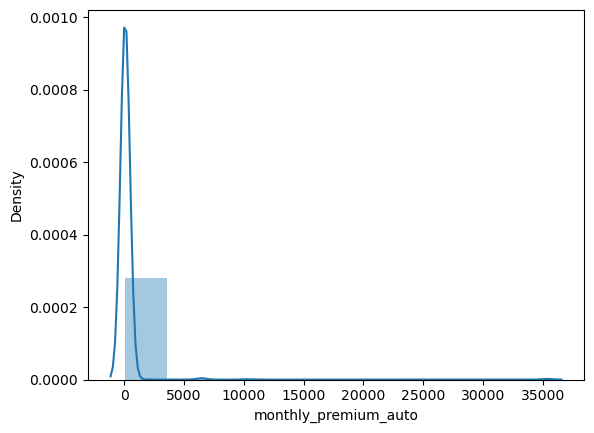

C:\Users\mburm\AppData\Local\Temp\ipykernel_21608\1736509712.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical[column],bins=10)


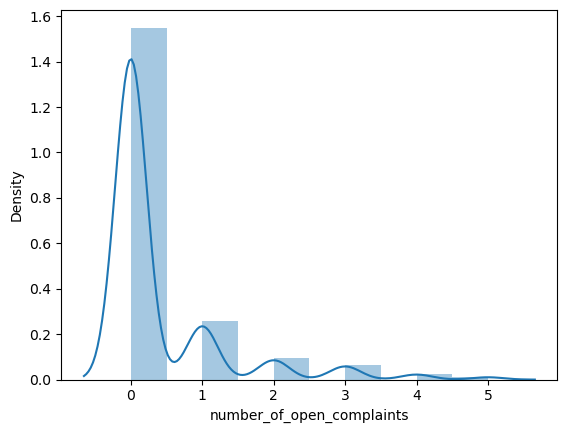

C:\Users\mburm\AppData\Local\Temp\ipykernel_21608\1736509712.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical[column],bins=10)


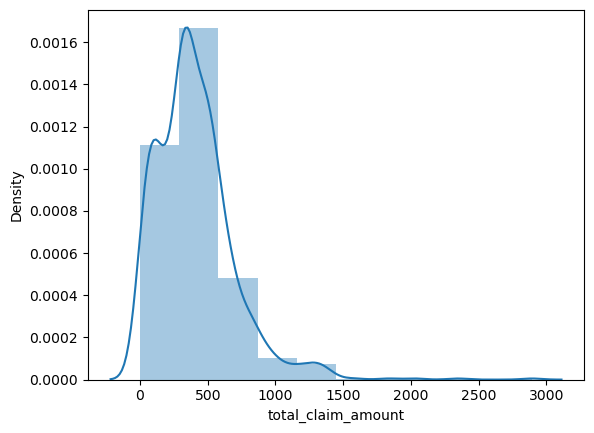

In [100]:
for column in numerical.columns:
    sns.distplot(numerical[column],bins=10)
    plt.show()

`Question` 
Now we will try to check the normality of the numerical variables visually:
- Use Matplotlib to construct histograms

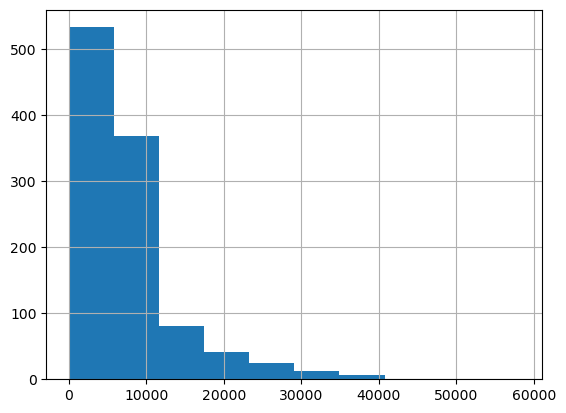

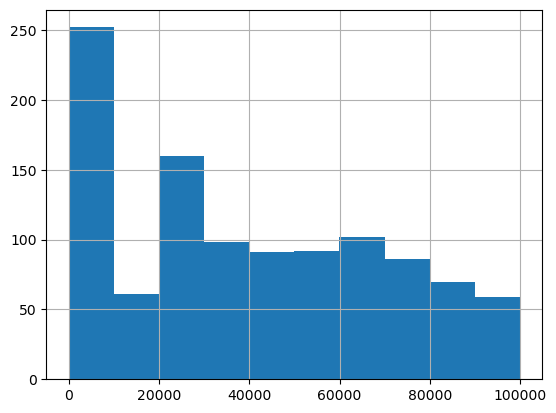

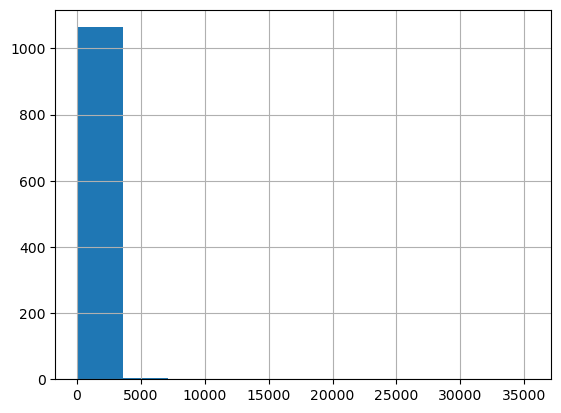

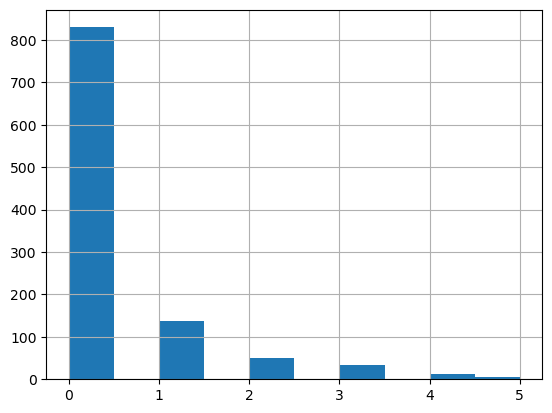

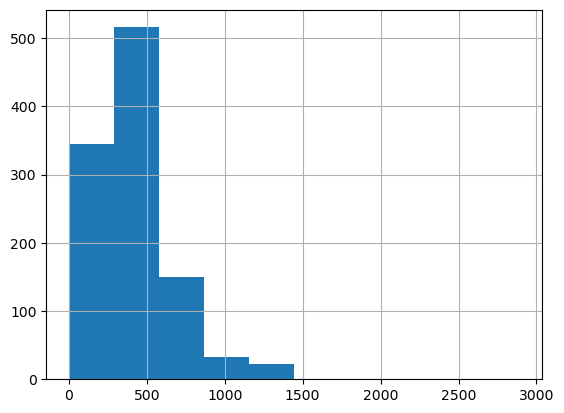

In [101]:
for column in numerical.columns:
    numerical[column].hist(bins=10)
    plt.show()
    
    
# data['target_d'].hist(bins=40)
# plt.show()

`Question` 
Now we will try to check the normality of the numerical variables visually:
- Do the distributions for different numerical variables look like a normal distribution?

`Answer`
- None of the numerical columns seem to have a normal distribution. The only closest to it (but still too far from a normal distribution), is 'income'
- Furthermore as a note. After checking the result from both charts (seaborn vs Matplotlib), it is easier to interpret the distribution of the data, using checking the seaborn's distplots 

`Question` For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.

In [106]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [102]:
numerical.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,1071.0,7914.670345,6439.447140,0.00,4019.75,5849.32,8945.21,58166.55
income,1071.0,39295.701214,30469.427060,0.00,14072.00,36234.00,64631.00,99960.00
monthly_premium_auto,1071.0,193.234360,1601.190369,61.00,68.00,83.00,109.50,35354.00
number_of_open_complaints,1071.0,0.394024,0.883769,0.00,0.00,0.00,0.00,5.00
total_claim_amount,1071.0,404.986928,293.027079,0.38,202.16,354.73,532.80,2893.24


In [107]:
# we first create the model. This just tells python to be ready to use a linear model, it does not actually compute anything yet

lm = linear_model.LinearRegression()

In [110]:
#we then name the variables y (target) and x (rest of features)

y = numerical['total_claim_amount']
X = numerical.drop(['total_claim_amount'], axis=1)

# we now "fit" (a.k.a. "train") the model in our data
# linear regression picks the line (i.e. the intercept and the gradient) that best "fits" our data
# we will get to the meaning of "fitting the data" in a second

lm.fit(X,y)
print("b0 = " , lm.intercept_)
print("b1 = " , lm.coef_) # coefficients is an array because later we will see we can have more than one dimension for our gradient

b0 =  488.487002393088
b1 =  [ 6.86227194e-03 -3.52429914e-03 -4.29760083e-03  3.82604734e+00]


In [112]:
print("R2-score is ",lm.score(X,y))
y_pred = lm.predict(X)
print("mean squared error (MSE) is ",mean_squared_error(y_pred,y))

R2-score is  0.15378510528151856
mean squared error (MSE) is  72592.2877015764


In [113]:
#R2-score of 0.15 is a bit far from being good (around 0.6)
#MSE of 7592.28, shows the error between the slope and the resulted values (269.43^2)

`Question` Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features

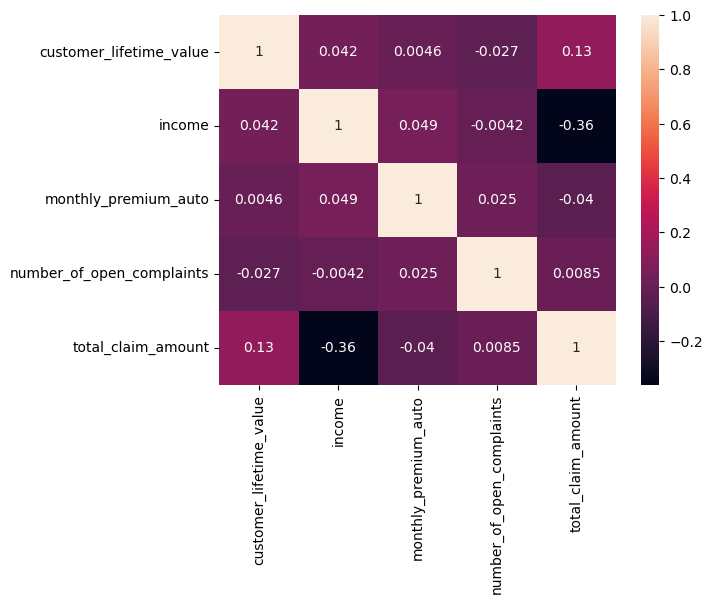

In [103]:
correlations_matrix = numerical.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [105]:
correlations_matrix

,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,total_claim_amount
customer_lifetime_value,1.000000,0.042318,0.004599,-0.026547,0.134880
income,0.042318,1.000000,0.049100,-0.004161,-0.361282
monthly_premium_auto,0.004599,0.049100,1.000000,0.025138,-0.040493
number_of_open_complaints,-0.026547,-0.004161,0.025138,1.000000,0.008471
total_claim_amount,0.134880,-0.361282,-0.040493,0.008471,1.000000


`Answer` if considering a high positive or negative correlation should be >0.85 or <-0.85, then we should not drop any variable

# Lab | Customer Analysis Round 5


In [114]:
display(insurance)

,customer,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
0,RB50392,Washington,Unknown,Master,0.00,0.0,1000.0,0,Personal Auto,Four-Door Car,2.70
1,QZ44356,Arizona,F,Bachelor,6979.54,0.0,94.0,0,Personal Auto,Four-Door Car,1131.46
2,AI49188,Nevada,F,Bachelor,12887.43,48767.0,108.0,0,Personal Auto,Two-Door Car,566.47
3,WW63253,California,M,Bachelor,7645.86,0.0,106.0,0,Corporate Auto,SUV,529.88
4,GA49547,Washington,M,High School or Below,5363.08,36357.0,68.0,0,Personal Auto,Four-Door Car,17.27
...,...,...,...,...,...,...,...,...,...,...,...
1066,TM65736,Oregon,M,Master,3059.55,38644.0,78.0,1,Personal Auto,Four-Door Car,361.46
1067,VJ51327,California,F,High School or Below,20315.00,63209.0,102.0,2,Personal Auto,SUV,207.32
1068,GS98873,Arizona,F,Bachelor,3239.12,16061.0,88.0,0,Personal Auto,Four-Door Car,633.60
1069,CW49887,California,F,Master,4626.80,79487.0,114.0,0,Special Auto,SUV,547.20


In [115]:
insurance.dtypes

customer                      object
state                         object
gender                        object
education                     object
customer_lifetime_value      float64
income                       float64
monthly_premium_auto         float64
number_of_open_complaints      int64
policy_type                   object
vehicle_class                 object
total_claim_amount           float64
dtype: object

In [116]:
#Bringing libraries for scaling
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler


`Question` X-y split. Remember that at this time yoou need the complete dataset, both numerical and categorical in the X features.

In [117]:
#Here we are splitting X and y, having y as 'total_claim_amount', meaning the target
y2 = insurance['total_claim_amount']
X2 = insurance.drop(['total_claim_amount'], axis=1)




`Question` X split into X_numerical and X_categorical

In [118]:
X2_num = X2.select_dtypes(include = np.number)
X2_cat = X2.select_dtypes(include = object)

`Question` Scaling (X_numerical).

In [119]:
# Normalizing data: make data range from 0 - 1, instead of from min to max
transformer = MinMaxScaler().fit(X2_num)
x2_normalized = transformer.transform(X2_num)
print(x2_normalized.shape)
x2_normalized
pd.DataFrame(x2_normalized, columns=X2_num.columns)

(1071, 4)


,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints
0,0.000000,0.000000,0.026606,0.0
1,0.119992,0.000000,0.000935,0.0
2,0.221561,0.487865,0.001332,0.0
3,0.131448,0.000000,0.001275,0.0
4,0.092202,0.363715,0.000198,0.0
...,...,...,...,...
1066,0.052600,0.386595,0.000482,0.2
1067,0.349256,0.632343,0.001162,0.4
1068,0.055687,0.160674,0.000765,0.0
1069,0.079544,0.795188,0.001502,0.0
